In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score , confusion_matrix, classification_report)


In [4]:
# KNN is a lazy learner
# During .predict() KNN does:

# -> Compute distance from the query point to all stored training points
# -> Sort distances
# -> Select the K nearest neighbors
# -> Majority vote for the predicted class
# -> That is why KNN can become slow when the dataset is large.

In [10]:
wine = load_wine()
x = wine.data
y = wine.target
print(wine.feature_names)
print('shape: ',x.shape)

x_train , x_test , y_train, y_test = train_test_split(
    x,y , test_size=0.25 , random_state=42 , stratify=y)


['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
shape:  (178, 13)


In [18]:
# Baseline KNN model (Euclidean distance via Minkowski p=2)
# pipeline
clf = Pipeline([
    ('Scaler: ', StandardScaler()),
    ('KNN :', KNeighborsClassifier(n_neighbors=7 , metric = 'minkowski' , p=2))
    # p=2  -> Euclidean    p=1 -> Manhattan
])

clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)


print('Accuracy: ',accuracy_score(y_test , y_pred))
print('\nConfusion matrix: \n',confusion_matrix(y_test , y_pred))
print('\nClassification report:\n ',classification_report(y_test , y_pred))

Accuracy:  0.9777777777777777

Confusion matrix: 
 [[15  0  0]
 [ 0 17  1]
 [ 0  0 12]]

Classification report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



# Model Evaluation & Optimization

In [20]:
# gonna tune K by trying a range of values and plotting accuracy
k_values = range(1,42)
accuracies = []

for k in k_values:
    model = Pipeline([
        ('Scaler: ', StandardScaler()),
        ('KNN :', KNeighborsClassifier(n_neighbors=k))
    ])

    model.fit(x_train , y_train)
    pred = model.predict(x_test)
    accuracies.append(accuracy_score(y_test , pred) )

print(accuracies)

[0.9555555555555556, 0.9333333333333333, 0.9555555555555556, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9777777777777777, 0.9555555555555556, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 1.0, 0.9777777777777777, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9777777777777777, 0.9777777777777777, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9777777777777777, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9111111111111111, 0.9333333333333333, 0.9111111111111111, 0.9111111111111111, 0.9111111111111111, 0.9555555555555556, 0.9111111111111111, 0.9333333333333333]


Best K:  15
Best accuracy:  1.0


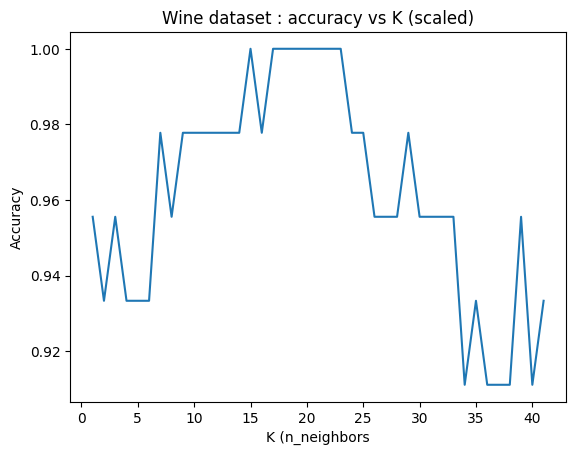

In [23]:
plt.plot(list(k_values) , accuracies)
plt.xlabel('K (n_neighbors')
plt.ylabel('Accuracy')
plt.title('Wine dataset : accuracy vs K (scaled)')

best_k = list(k_values)[int(np.argmax(accuracies))]
#          |                      |-> Maximum accuracy je index e ache, oi index return kore.
#          |-> oi max accu er index ta kon k_value er jonno

print('Best K: ',best_k)
print('Best accuracy: ',float(np.max(accuracies)))

#### Compare distance metrics and voting weights

In [30]:
#### Compare distance metrics and voting weights
k_demo = best_k

settings = [
    ('Euclidean (p=2) , uniform',KNeighborsClassifier(n_neighbors=k_demo , 
                                                      metric='minkowski',p=2 ,
                                                      weights='uniform')),
    
    ('Euclidean (p=2) , distance',KNeighborsClassifier(n_neighbors=k_demo , 
                                                      metric='minkowski',p=2 ,
                                                      weights='distance')),
     
    ('Manhattan (p=1) , uniform',KNeighborsClassifier(n_neighbors=k_demo , 
                                                      metric='minkowski',p=1 ,
                                                      weights='uniform'))
]

rows = []
for name,knn in settings:
  model = Pipeline([("scaler", StandardScaler()), ("knn",knn)])
  model.fit(x_train, y_train)
  pred = model.predict(x_test)
  rows.append([name, accuracy_score(y_test,pred)])

pd.DataFrame(rows, columns=["Setting", "Accuracy"]).sort_values("Accuracy", ascending=False)

,Setting,Accuracy
0,"Euclidean (p=2) , uniform",1.000000
1,"Euclidean (p=2) , distance",1.000000
2,"Manhattan (p=1) , uniform",0.977778


## KNN without scaling

In [32]:
# knn without scaling
knn_no_scale = KNeighborsClassifier(n_neighbors=best_k)
knn_no_scale.fit(x_train,y_train)
pred_no_scale = knn_no_scale.predict(x_test)

acc_no_scale = accuracy_score(y_test , pred_no_scale)

# knn without scaling (pipeline)
pred_scale = clf.predict(x_test)
acc_scale = accuracy_score(y_test , pred_scale)

print('Acccuracy without scaling: ',float(acc_no_scale))
print('Acccuracy with scaling: ',float(acc_scale))

Acccuracy without scaling:  0.7777777777777778
Acccuracy with scaling:  0.9777777777777777
